## Learning theory properties II
Here I check the effects of the time constant on the learning of the connectivity matrix

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, BCPNNModular, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

In [2]:
from_pattern = 2
to_pattern = 3

def get_weights(manager, from_pattern, to_pattern):

    w_self = manager.nn.w_ampa[from_pattern, from_pattern]
    w_next = manager.nn.w_ampa[to_pattern, from_pattern]
    w_rest = np.mean(nn.w_ampa[(to_pattern + 1):, from_pattern])
    
    return w_self, w_next, w_rest

## An example

In [3]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.100
tau_p  = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

markersize = 32
linewidth = 10

In [4]:
# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_pre_ampa, tau_p=tau_p,
                z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


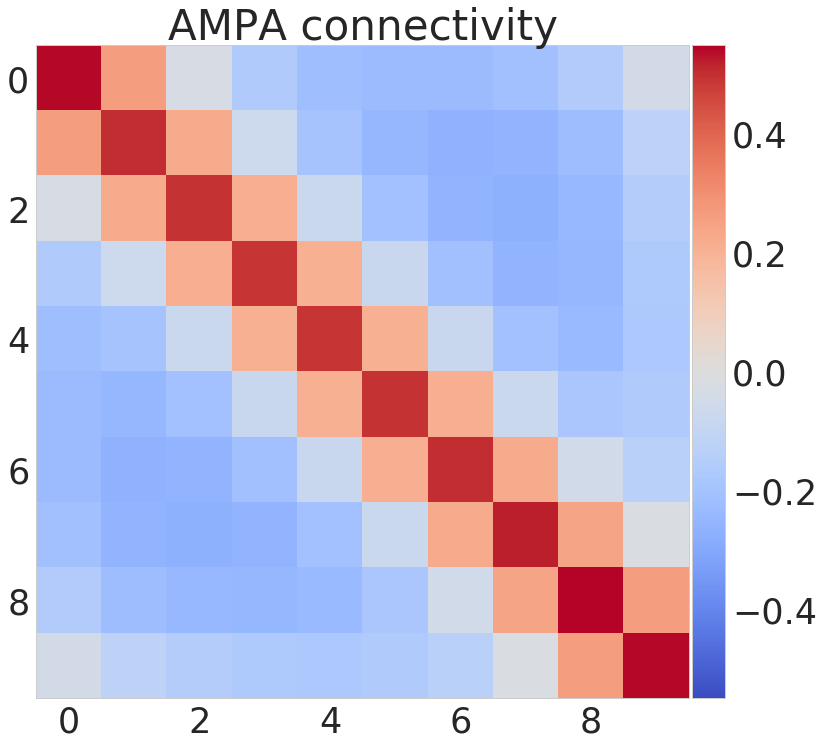

In [5]:
plot_weight_matrix(manager.nn, ampa=True)

In [6]:
nn.get_parameters()

{'G': 1.0,
 'epsilon': 1e-20,
 'g_I': 10.0,
 'g_a': 10.0,
 'g_beta': 1,
 'g_w': 0.0,
 'g_w_ampa': 2.0,
 'k': 0.0,
 'sigma': 0.0,
 'tau_a': 0.25,
 'tau_m': 0.02,
 'tau_p': 10.0,
 'tau_z_post': 0.005,
 'tau_z_post_ampa': 0.1,
 'tau_z_pre': 0.15,
 'tau_z_pre_ampa': 0.1}

success 100.0


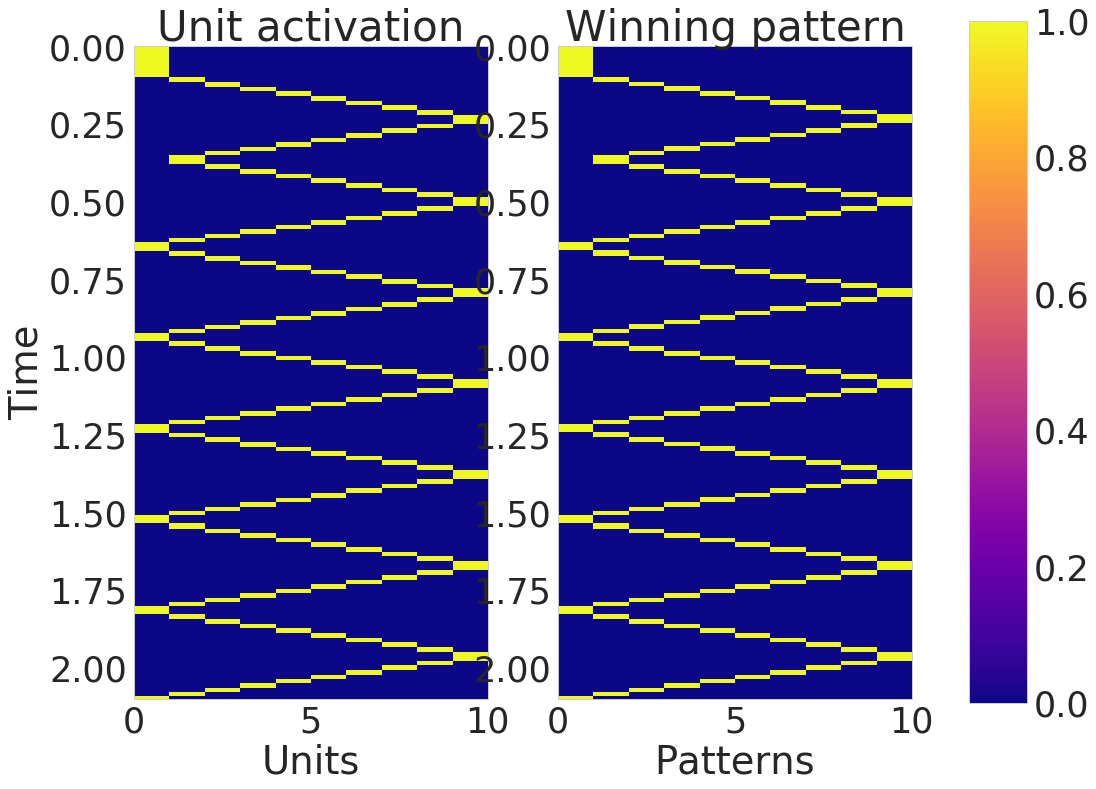

In [7]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

## Learning results

In [19]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.050
tau_p  = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

markersize = 32
linewidth = 10

#### Tau_z

In [41]:
tau_z_vector = np.arange(0.005, 0.155, 0.005)
w_self_vector_tau_z = np.zeros_like(tau_z_vector )
w_next_vector_tau_z = np.zeros_like(tau_z_vector )
w_rest_vector_tau_z = np.zeros_like(tau_z_vector )

for index, tau_z_pre_ampa_ in enumerate(tau_z_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa_, tau_z_post_ampa=tau_z_pre_ampa_, tau_p=tau_p,
                z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)

    w_self_vector_tau_z[index] = w_self
    w_next_vector_tau_z[index] = w_next
    w_rest_vector_tau_z[index] = w_rest

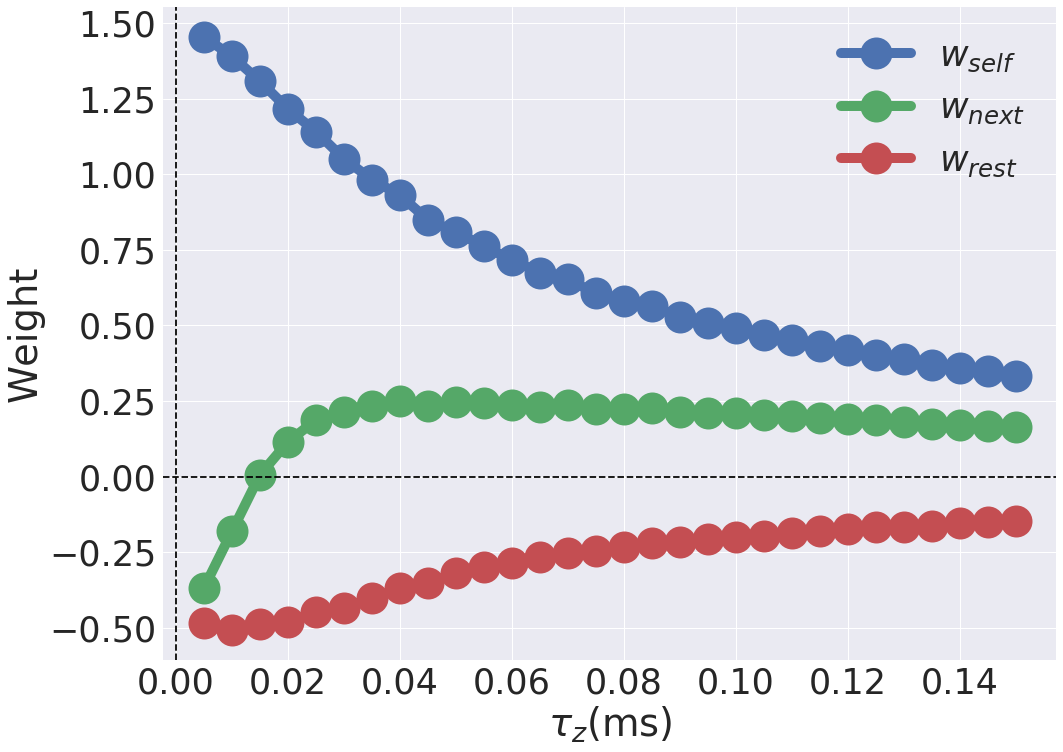

In [42]:
fig1 = plt.figure(figsize=(16, 12))
ax1 = fig1.add_subplot(111)
ax1.plot(tau_z_vector, w_self_vector_tau_z, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax1.plot(tau_z_vector, w_next_vector_tau_z, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax1.plot(tau_z_vector, w_rest_vector_tau_z, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax1.set_xlabel(r'$\tau_z$(ms)')
ax1.set_ylabel('Weight')

ax1.axhline(0, ls='--', color='black')
ax1.axvline(0, ls='--', color='black')


ax1.legend();

#### tau_p

In [26]:
tau_p_vector = np.arange(1.0, 23.0, 2.0)
w_self_vector_tau_p = np.zeros_like(tau_p_vector)
w_next_vector_tau_p = np.zeros_like(tau_p_vector)
w_rest_vector_tau_p = np.zeros_like(tau_p_vector)

for index, tau_p_ in enumerate(tau_p_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_pre_ampa, tau_p=tau_p_,
                z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)

    w_self_vector_tau_p[index] = w_self
    w_next_vector_tau_p[index] = w_next
    w_rest_vector_tau_p[index] = w_rest

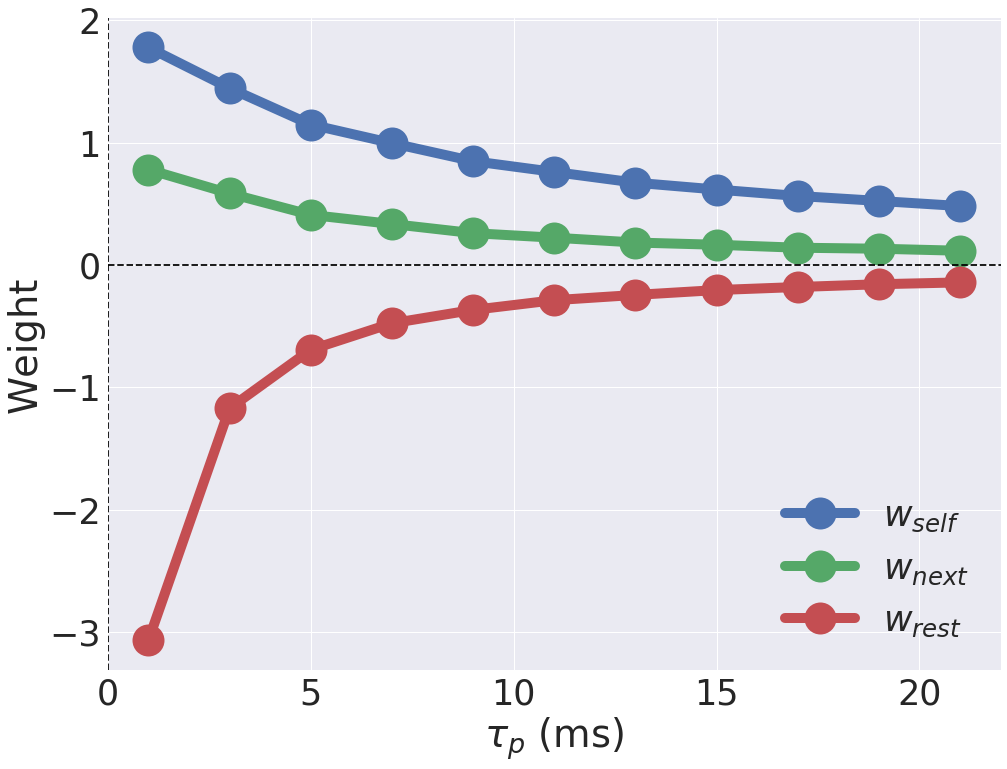

In [43]:
fig2 = plt.figure(figsize=(16, 12))
ax2 = fig2.add_subplot(111)
ax2.plot(tau_p_vector, w_self_vector_tau_p, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax2.plot(tau_p_vector, w_next_vector_tau_p, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax2.plot(tau_p_vector, w_rest_vector_tau_p, 'o-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax2.set_xlabel(r'$\tau_p$ (ms)')
ax2.set_ylabel('Weight')

ax2.axhline(0, ls='--', color='black')
ax2.axvline(0, ls='--', color='black')


ax2.legend();